In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [2]:
#import time
def true_fun(X):
    return 66 * X
#np.random.seed(int(time.time()))
np.random.seed(10)
n_samples = 30
X = 40+200*np.sort(np.random.rand(n_samples,1))
Y = true_fun(X) + np.random.randn(n_samples,1) * 2000

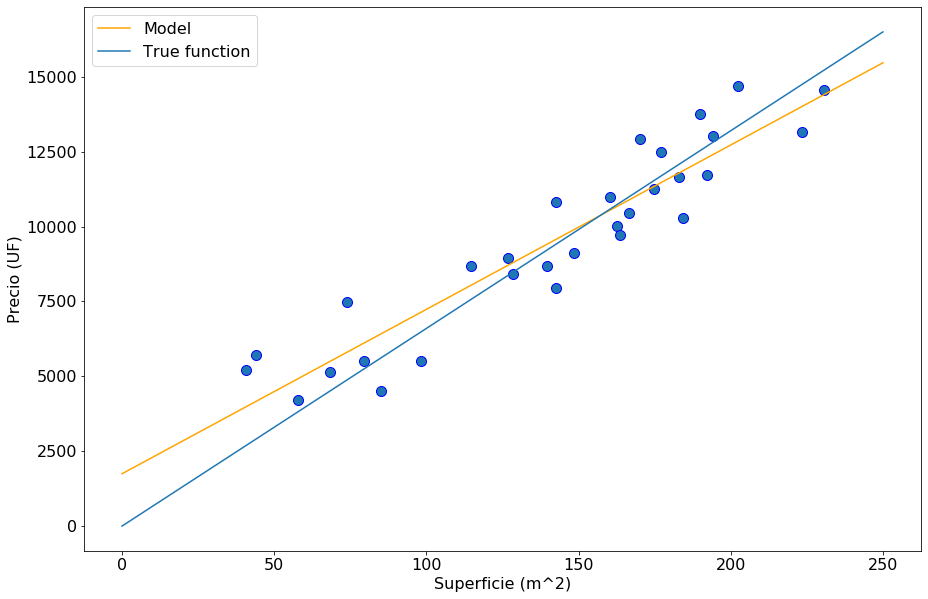

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})
polynomial_features = PolynomialFeatures(degree=1, include_bias=True)
regression = models.LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", regression)])
pipeline.fit(X, Y)
scores = cross_val_score(pipeline, X, Y, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace([0], [250], 100)
plt.plot(X_test, pipeline.predict(X_test), color='orange', label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, Y, edgecolor='b', s=100)
plt.xlabel("Superficie (m^2)")
plt.ylabel("Precio (UF)")
plt.legend(loc="best")
plt.show()

In [4]:
theta = np.random.randn(1,1)
b = np.random.randn(1,1)
learning_rate = 1e-5
loss = 1e10
iteration = 1
dec = 0.1
while dec < 0.9999:
    Y_pred = X.dot(theta) + b
    new_loss = 0.5*np.square(Y_pred - Y).sum()/n_samples
    dec = new_loss/loss
    loss = new_loss
    print("Loss at iteration %d is:" % iteration, loss)

    grad_theta = X.T.dot(Y_pred - Y)/n_samples
    grad_b = (Y_pred - Y).sum(keepdims=True)/n_samples
    theta -= learning_rate * grad_theta
    b -= learning_rate * grad_b
    iteration+=1

Loss at iteration 1 is: 46753049.58598234
Loss at iteration 2 is: 28084603.00974575
Loss at iteration 3 is: 16997006.605502475
Loss at iteration 4 is: 10411841.908836957
Loss at iteration 5 is: 6500769.275921147
Loss at iteration 6 is: 4177898.048342559
Loss at iteration 7 is: 2798294.15927834
Loss at iteration 8 is: 1978917.2470435053
Loss at iteration 9 is: 1492271.3144075817
Loss at iteration 10 is: 1203241.5433701428
Loss at iteration 11 is: 1031580.3064320758
Loss at iteration 12 is: 929626.7932208658
Loss at iteration 13 is: 869074.2124187212
Loss at iteration 14 is: 833110.54533678
Loss at iteration 15 is: 811750.7686207045
Loss at iteration 16 is: 799064.5598486658
Loss at iteration 17 is: 791529.7716226293
Loss at iteration 18 is: 787054.5240394308
Loss at iteration 19 is: 784396.4041518747
Loss at iteration 20 is: 782817.5159033901
Loss at iteration 21 is: 781879.6067857996
Loss at iteration 22 is: 781322.389107883
Loss at iteration 23 is: 780991.2723517644
Loss at iteration 

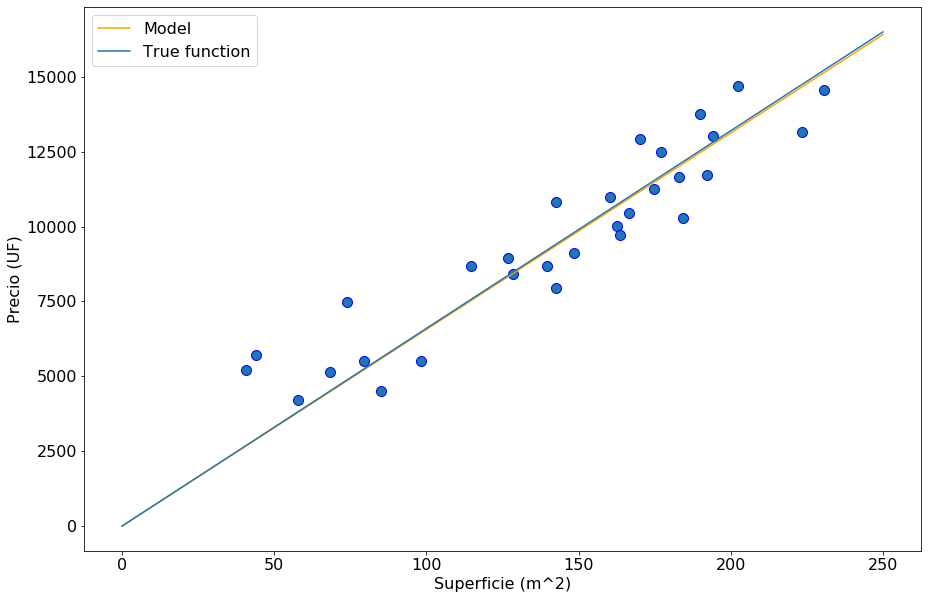

In [5]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})
X_test = np.linspace([0], [250], 100)

plt.plot(X_test, X_test.dot(theta), color='orange', label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, Y, edgecolor='b', s=100)
plt.xlabel("Superficie (m^2)")
plt.ylabel("Precio (UF)")
plt.legend(loc="best")
plt.show()